<a href="https://colab.research.google.com/github/anitahf/Clase---Aprendizaje-Automatico/blob/main/A_Hidalgo_01_Mi_segundo_modelo_Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi segundo modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido: Ana Hidalgo &bull; Fecha: 11/29/2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este cuaderno está diseñado practicar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.



Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [ ]:
# Paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [ ]:
# Lectura de los datos
url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"
df = pd.read_csv(url)

# Mostrar primeras filas
df.head()

# Selección de variables
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target = 'price'

X = df[features]
y = df[[target]]

df[features + ['price']].head()



,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza un escalado de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [ ]:
# Probamos diferentes escaladores
scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler()
}

resultados = {}

for nombre, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=0
    )

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados[nombre] = (mse, r2)

resultados



{'StandardScaler': (59742013410.60425, 0.49764657992909955),
 'MinMaxScaler': (59742013410.60304, 0.49764657992910966),
 'RobustScaler': (59742013410.60425, 0.49764657992909955)}

Los tres escaladores obtuvieron resultados prácticamente idénticos. Sin embargo, se selecciona StandardScaler, ya que es el método más comúnmente utilizado para modelos lineales y mantiene las variables centradas con media cero y varianza unitaria, lo que mejora la estabilidad numérica del modelo.

---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada elemento.

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
target = 'price'

X = df[features]
y = df[[target]]

print("Dimensión de X:", X.shape)
print("Dimensión de y:", y.shape)

X.head(), y.head()

Dimensión de X: (21613, 5)
Dimensión de y: (21613, 1)


(   bedrooms  bathrooms  sqft_living  sqft_lot  floors
 0         3       1.00         1180      5650     1.0
 1         3       2.25         2570      7242     2.0
 2         2       1.00          770     10000     1.0
 3         4       3.00         1960      5000     1.0
 4         3       2.00         1680      8080     1.0,
       price
 0  221900.0
 1  538000.0
 2  180000.0
 3  604000.0
 4  510000.0)

---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [ ]:
# Dividir los datos en entrenamiento y prueba
# random_state = 9 (último dígito de tu cédula)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=9
)

print("Dimensión X_train:", X_train.shape)
print("Dimensión y_train:", y_train.shape)
print("Dimensión X_test:", X_test.shape)
print("Dimensión y_test:", y_test.shape)


Dimensión X_train: (17290, 5)
Dimensión y_train: (17290, 1)
Dimensión X_test: (4323, 5)
Dimensión y_test: (4323, 1)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

In [ ]:
# Revisar distribución de precios en train y test

print("Distribución de y_train:")
display(y_train.describe())

print("Distribución de y_test:")
display(y_test.describe())


Distribución de y_train:


,price
count,1.729000e+04
mean,5.393198e+05
std,3.653520e+05
min,7.500000e+04
25%,3.224250e+05
50%,4.500000e+05
75%,6.403750e+05
max,7.700000e+06


Distribución de y_test:


,price
count,4.323000e+03
mean,5.431611e+05
std,3.741701e+05
min,8.000000e+04
25%,3.200000e+05
50%,4.499500e+05
75%,6.525500e+05
max,5.570000e+06


---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y entrenalo con los datos de entrenamiento.

In [ ]:
# Definir un modelo de regresión lineal y entrenarlo

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Intercepto del modelo:", modelo.intercept_[0])
print("\nCoeficientes por variable:")
for nombre_var, coef in zip(features, modelo.coef_[0]):
    print(f"{nombre_var}: {coef}")


Intercepto del modelo: 512074.5063575372

Coeficientes por variable:
bedrooms: -56057.324952858886
bathrooms: 4444.533728374925
sqft_living: 347596.8006683524
sqft_lot: -2047.3792993672469
floors: -1267.8281334002113


---
## <font color='264CC7'> Evaluación </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [ ]:
y_pred = modelo.predict(X_test)

df_predicciones = pd.DataFrame({
    'Precio real': y_test.values.flatten(),
    'Precio predicho': y_pred.flatten()
})

df_predicciones.head(10)

,Precio real,Precio predicho
0,262000.0,327519.925390
1,593777.0,384908.727938
2,405000.0,437742.997087
3,366000.0,486693.172880
4,361000.0,372703.776448
5,582000.0,669652.311377
6,970500.0,686828.948998
7,353500.0,872704.436977
8,438924.0,243169.852780
9,349900.0,453789.306457


Calcula el error cuadrático medio.

In [ ]:
# Calcular el error cuadrático medio del modelo entrenado

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) con el escalado elegido:", mse)


Error cuadrático medio (MSE) con el escalado elegido: 65009322812.336815


In [ ]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler,
    Normalizer,
    QuantileTransformer,
    PowerTransformer
)

# Diccionario con todos los escaladores a comparar
escaladores = {
    'MaxAbsScaler': MaxAbsScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler(),
    'Normalizer': Normalizer(),
    'QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=0),
    'PowerTransformer': PowerTransformer(method='yeo-johnson')
}

resultados_escalado = {}

for nombre, esc in escaladores.items():
    # Escalar X completo
    X_esc = esc.fit_transform(X)

    # Dividir en train/test SIEMPRE con el mismo random_state=9
    X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
        X_esc, y, test_size=0.2, random_state=9
    )

    # Entrenar modelo
    modelo_e = LinearRegression()
    modelo_e.fit(X_train_e, y_train_e)

    # Predecir y calcular MSE
    y_pred_e = modelo_e.predict(X_test_e)
    mse_e = mean_squared_error(y_test_e, y_pred_e)

    resultados_escalado[nombre] = mse_e

# Mostrar resultados en una tabla ordenada
resultados_escalado_df = pd.DataFrame.from_dict(
    resultados_escalado, orient='index', columns=['MSE']
).sort_values('MSE')

resultados_escalado_df


,MSE
MinMaxScaler,6.500932e+10
MaxAbsScaler,6.500932e+10
StandardScaler,6.500932e+10
RobustScaler,6.500932e+10
PowerTransformer,8.205955e+10
QuantileTransformer,8.255807e+10
Normalizer,1.077856e+11


Escribe el error cuadrático medio para cada tipo de escalado:

Escalado MaxAbsScaler: 6.500932 × 10¹⁰

Escalado MinMaxScaler: 6.500932 × 10¹⁰

Escalado RobustScaler: 6.500932 × 10¹⁰

Escalado StandardScaler: 6.500932 × 10¹⁰

Escalado Normalizer: 1.077856 × 10¹¹

Escalado QuantileTransformer: 8.255807 × 10¹⁰

Escalado PowerTransformer: 8.205955 × 10¹⁰

Escribe un párrafo sobre qué hace cada escalado no visto en clase:

**Escalado MaxAbsScaler**: divide cada valor entre el valor absoluto máximo de su columna. Es similar al Min-Max, pero no cambia el signo de los datos. Se usa mucho cuando las variables pueden tener valores positivos y negativos, y cuando no queremos modificar la forma original de los datos.

RobustScaler

**Escalado RobustScaler**: es útil cuando hay outliers porque en lugar de usar la media y desviación estándar, usa la mediana y el rango intercuartílico (IQR). Esto hace que los valores extremos afecten mucho menos al escalado y las variables queden más “estables”.

**Escalado Normalizer**: no escala columna por columna, sino fila por fila: convierte cada registro en un vector unitario. Es decir, normaliza toda la fila para que su longitud sea 1. Esto sirve para modelos basados en distancia o dirección, pero no funciona bien en regresión lineal porque cambia completamente la estructura de los datos.

**Escalado QuantileTransformer**: transforma la distribución de la variable para que siga una distribución uniforme o normal. Lo que hace es ordenar los valores y asignarles nuevos valores según su posición (cuantil). Es útil cuando los datos tienen formas muy irregulares o sesgadas.

**Escalado PowerTransformer**: aplica una transformación matemática (Box-Cox o Yeo-Johnson) para que los datos se parezcan más a una distribución normal. Ayuda cuando las variables tienen formas muy asimétricas. Es más fuerte que estandarizar, porque directamente cambia la forma de la distribución.



**Graficas de mi modelo y ver cual variable es mejor ajustada**

In [1]:
def plot_regresion_variable(col_index, variable_name):
    plt.figure(figsize=(8,5))

    # Scatter de datos reales de entrenamiento
    plt.scatter(X_train[:, col_index], y_train, alpha=0.4, label='Datos de entrenamiento')

    # Crear rango para la variable seleccionada
    x_line = np.linspace(X_train[:, col_index].min(), X_train[:, col_index].max(), 100).reshape(-1, 1)

    # Matriz completa con promedios
    X_line_full = np.zeros((100, 5))
    X_line_full[:] = X_train.mean(axis=0)
    X_line_full[:, col_index] = x_line.flatten()

    # Predicción con el modelo ya entrenado
    y_line = modelo.predict(X_line_full)

    plt.plot(x_line, y_line, color='red', linewidth=2, label='Recta ajustada')

    plt.xlabel(f'{variable_name} (escalado)')
    plt.ylabel('price')
    plt.title(f'Regresión lineal sobre {variable_name}')
    plt.legend()
    plt.show()


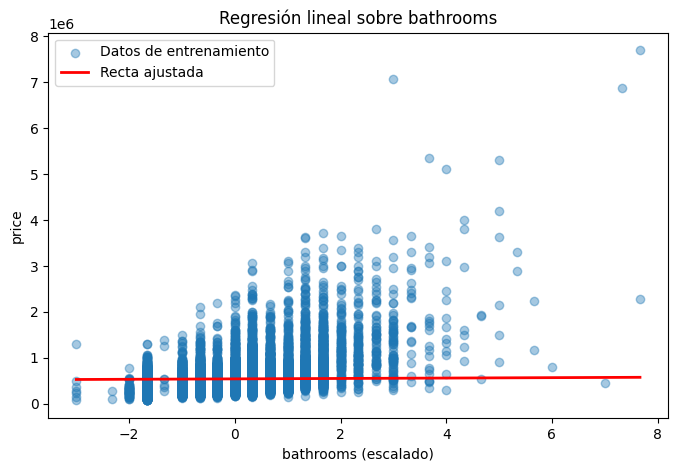

In [ ]:
plot_regresion_variable(1, 'bathrooms')


La variable bathrooms muestra una ligera tendencia ascendente, pero la dispersión sigue siendo muy alta. Aunque el precio promedio aumenta levemente con el número de baños, la recta ajustada casi se mantiene horizontal, lo cual refleja que la relación lineal es débil. Esta variable influye, pero no es determinante de forma aislada.

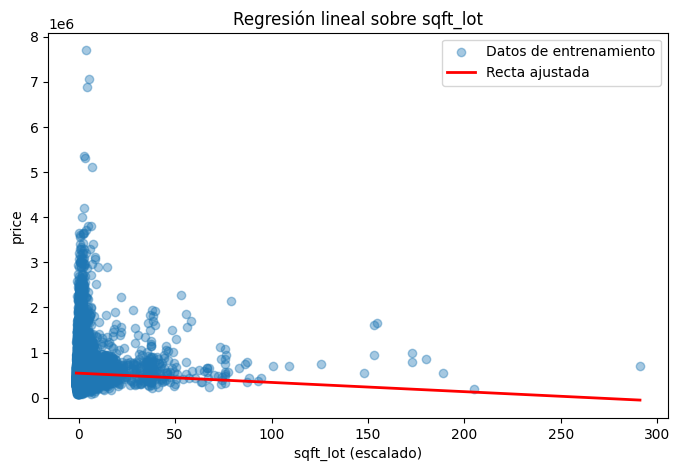

In [ ]:
plot_regresion_variable(3, 'sqft_lot')


La variable sqft_lot muestra una dispersión extrema, donde la mayoría de puntos se concentran cerca del origen. No se observa un patrón lineal claro, y la recta ajustada casi no inclina, o incluso se inclina levemente hacia abajo. Esto indica que el tamaño del terreno no tiene una relación lineal fuerte con el precio, posiblemente porque el terreno influye de forma más compleja o no proporcional.

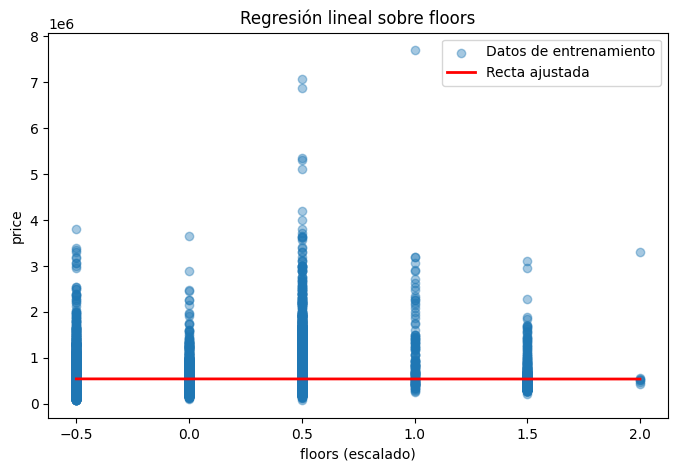

In [ ]:
plot_regresion_variable(4, 'floors')


La variable floors muestra agrupaciones discretas (1 piso, 1.5 pisos, 2 pisos, etc.) y no presenta una tendencia lineal clara. La recta ajustada es prácticamente horizontal, reflejando que el número de pisos no tiene una relación lineal significativa con el precio cuando se consideran otras variables en el modelo.

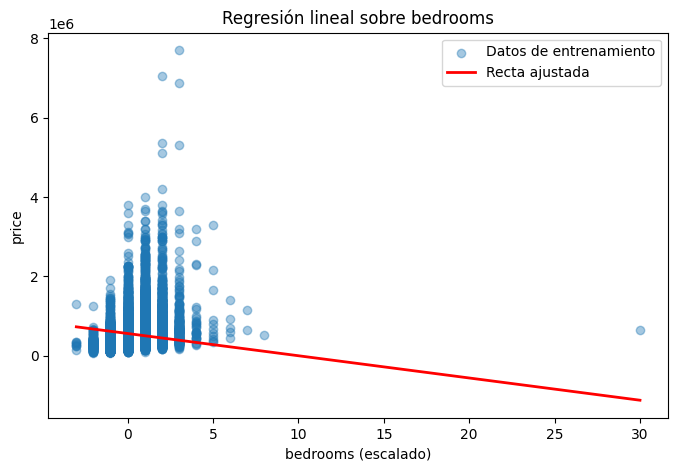

In [ ]:
plot_regresion_variable(0, 'bedrooms')


La variable bedrooms presenta una relación lineal muy débil respecto al precio. La nube de puntos muestra una gran dispersión y la recta ajustada tiene una pendiente negativa, lo cual indica que, manteniendo constantes las demás variables, el número de dormitorios por sí solo no explica el precio de manera efectiva. Esta variable no es un buen predictor lineal independiente en el modelo.

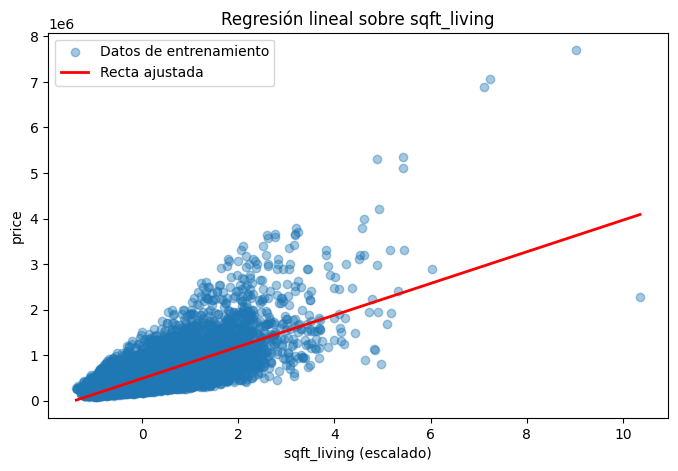

In [ ]:
plot_regresion_variable(2, 'sqft_living')


La variable sqft_living presenta una relación positiva fuerte con el precio. A medida que aumenta el tamaño habitable, el precio se incrementa de forma consistente. La recta ajustada muestra una pendiente clara y positiva, indicando que esta es una de las características que más peso tienen en el modelo de regresión lineal. Es una variable altamente predictiva.

**CONCLUSION**

De las cinco variables analizadas, solo sqft_living muestra una relación lineal fuerte y consistente con el precio de las viviendas. Variables como bedrooms, bathrooms, sqft_lot y floors presentan una relación lineal débil o casi inexistente cuando se visualizan individualmente. Esto confirma que el tamaño habitable es el predictor más importante dentro del modelo de regresión lineal para el dataset de King County.